In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import scipy
import pandas as pd
import yfinance as yf
from datetime import datetime, date, timedelta
import time
from matplotlib import pyplot as plt

In [8]:
from helpers import *

In [9]:
ndx, spx = get_ndx_spx_data()

In [10]:
ndx

,Date,Open,Close,return,log_return
0,1985-10-02,112.139999,110.824997,-0.011726,-0.011796
1,1985-10-03,110.839996,110.870003,0.000406,0.000406
2,1985-10-04,110.870003,110.074997,-0.007171,-0.007196
3,1985-10-07,110.074997,108.199997,-0.017034,-0.017181
4,1985-10-08,108.199997,107.160004,-0.009612,-0.009658
...,...,...,...,...,...
9671,2024-02-16,17853.589844,17685.980469,-0.008951,-0.008991
9672,2024-02-20,17591.169922,17546.099609,-0.007909,-0.007941
9673,2024-02-21,17412.789062,17478.910156,-0.003829,-0.003837
9674,2024-02-22,17857.759766,18004.699219,0.030081,0.029638


In [11]:
ndx[ndx['Date']>date(2010, 1, 1)]

,Date,Open,Close,return,log_return
6117,2010-01-04,1882.689941,1886.699951,0.014186,0.014086
6118,2010-01-05,1887.280029,1888.430054,0.000917,0.000917
6119,2010-01-06,1887.910034,1878.420044,-0.005301,-0.005315
6120,2010-01-07,1878.160034,1876.719971,-0.000905,-0.000905
6121,2010-01-08,1870.900024,1892.589966,0.008456,0.008421
...,...,...,...,...,...
9671,2024-02-16,17853.589844,17685.980469,-0.008951,-0.008991
9672,2024-02-20,17591.169922,17546.099609,-0.007909,-0.007941
9673,2024-02-21,17412.789062,17478.910156,-0.003829,-0.003837
9674,2024-02-22,17857.759766,18004.699219,0.030081,0.029638


In [12]:
ndx_2010_and_after = ndx[ndx['Date']>date(2010, 1, 1)].reset_index(drop=True)
spx_2010_and_after = spx[spx['Date']>date(2010, 1, 1)].reset_index(drop=True)

In [13]:
scipy.stats.skew(ndx_2010_and_after['return'])

-0.32908672153681917

In [14]:
scipy.stats.skew(ndx_2010_and_after['log_return'])

-0.49865417706876003

In [15]:
scipy.stats.kurtosis(ndx_2010_and_after['return'])

6.548494963360925

In [16]:
scipy.stats.kurtosis(ndx_2010_and_after['log_return'])

7.035456917159452

For NDX100 data from 2010 onwards, for both daily returns and daily log returns, the tails are much 'fatter' than that of a normal distribution as indicated by the high kurtosis. In addition, for both returns and daily log returns, there is negative skewness indicating greater likelihood of large loss than large gain

In [17]:
scipy.stats.skew(spx_2010_and_after['return'])

-0.484820825932147

In [18]:
scipy.stats.skew(spx_2010_and_after['log_return'])

-0.7222514573042691

In [19]:
scipy.stats.kurtosis(spx_2010_and_after['return'])

12.220089084916713

In [20]:
scipy.stats.kurtosis(spx_2010_and_after['log_return'])

13.172672085706445

The results for SPX follow the pattern of NDX100 except that the tails are even fatter and there is more negative skewness

(array([ 0.12619464,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.12619464,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.12619464,
         0.        ,  0.        ,  0.12619464,  0.        ,  0.12619464,
         0.        ,  0.12619464,  0.63097321,  0.25238928,  0.50477857,
         0.63097321,  0.88336249,  1.38814106,  0.63097321,  1.26194642,
         2.39769819,  1.64053034,  2.14530891,  4.03822854,  3.78583925,
         5.17398031,  6.18353745,  8.83362493,  9.9693767 , 13.25043739,
        14.38618917, 20.31733733, 25.86990157, 37.35361398, 49.34210495,
        48.20635317, 42.14901037, 33.56777472, 28.51998905, 18.55061235,
        16.27910879, 14.51238381,  7.57167851,  6.56212137,  5.55256424,
         3.78583925,  2.52389284,  2.39769819,  1.8

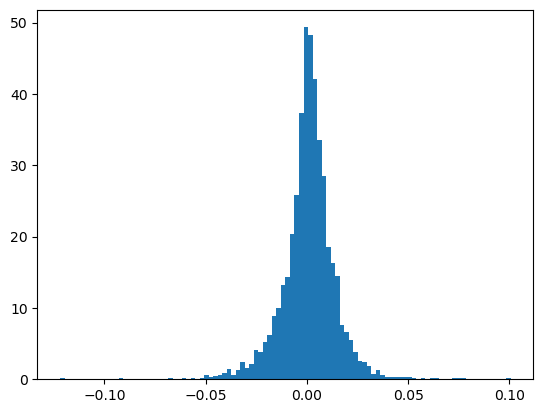

In [21]:
plt.hist(ndx_2010_and_after['return'], bins=100, density=True)

(array([ 0.12432762,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.12432762,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.12432762,  0.        ,  0.        ,  0.12432762,
         0.        ,  0.        ,  0.12432762,  0.12432762,  0.49731047,
         0.24865523,  0.37298285,  0.37298285,  0.49731047,  1.49193141,
         0.87029332,  0.7459657 ,  1.24327617,  2.23789711,  1.86491426,
         2.8595352 ,  2.98386282,  4.22713899,  5.22175993,  6.4650361 ,
         9.82188177,  9.07591607, 13.80036553, 14.67065885, 21.13569495,
        29.21699008, 39.03887185, 49.60671932, 49.10940885, 36.80097474,
        35.30904333, 24.49254062, 18.52481499, 15.16796932, 11.4381408 ,
         7.45965704,  7.21100181,  4.22713899,  3.1

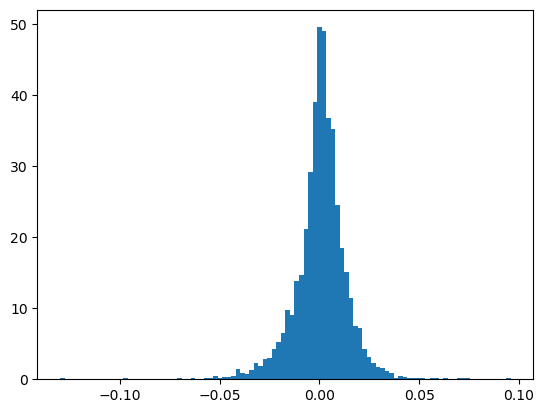

In [22]:
plt.hist(ndx_2010_and_after['log_return'], bins=100, density=True)

(array([ 0.13150187,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.13150187,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.13150187,  0.        ,  0.        ,  0.        ,  0.13150187,
         0.        ,  0.        ,  0.        ,  0.13150187,  0.        ,
         0.        ,  0.13150187,  0.        ,  0.26300374,  0.        ,
         0.78901123,  0.13150187,  0.52600749,  0.26300374,  0.78901123,
         1.05201497,  1.05201497,  1.8410262 ,  0.9205131 ,  3.02454304,
         1.8410262 ,  3.6820524 ,  4.6025655 ,  7.3641048 ,  8.15311603,
        11.57216468, 11.9666703 , 21.56630691, 25.64286492, 38.66155019,
        60.75386458, 65.88243756, 48.39268867, 38.00404083, 29.71942293,
        19.46227696, 17.88425451, 13.41319088,  8.81062538,  4.99707111,
         3.15604491,  2.7615393 ,  2.23553181,  1.3

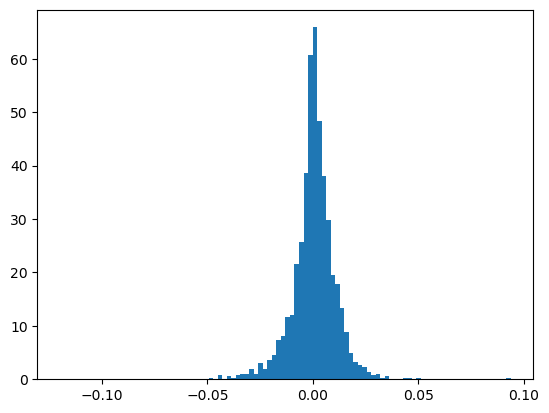

In [23]:
plt.hist(spx_2010_and_after['return'], bins=100, density=True)

(array([ 0.12928302,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.12928302,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.12928302,  0.        ,  0.        ,
         0.        ,  0.        ,  0.12928302,  0.        ,  0.        ,
         0.12928302,  0.        ,  0.        ,  0.        ,  0.12928302,
         0.12928302,  0.12928302,  0.51713207,  0.25856604,  0.25856604,
         0.38784905,  0.51713207,  0.90498112,  1.03426414,  1.03426414,
         1.80996225,  1.03426414,  2.84422639,  2.45637734,  3.87849054,
         4.78347166,  7.62769805,  8.6619622 , 12.02332066, 14.73826404,
        22.75381114, 28.31298091, 45.37833927, 65.67577307, 57.66022596,
        47.0590185 , 33.22573559, 26.11516961, 19.90958475, 14.73826404,
        10.47192445,  6.72271693,  4.52490562,  2.9

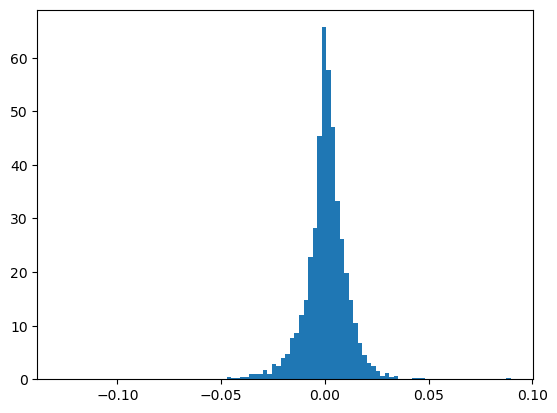

In [24]:
plt.hist(spx_2010_and_after['log_return'], bins=100, density=True)

In [39]:
def plot_hist_and_overlay_normal(data, mean, sd):
    '''
    data: list of data points to create a histogram from
    '''
    data.sort()
    d_min = data[0]
    d_max = data[len(data)-1]
    
    x = np.linspace(d_min, d_max + .01, 10000)
    y = scipy.stats.norm.pdf(x, loc = mean, scale = sd)
    
    fig, ax1 = plt.subplots()
    #ax1.set_ylim(bottom=0)
    ax1.hist(data, bins=100, color='blue', alpha=0.7, density=True)
    
    ax2 = ax1.twinx()
    #ax2.set_ylim(bottom=0)
    ax2.plot(x, y, color='red', linestyle='-', linewidth=2, label='Normal Dist')
    
       
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Histogram Density')
    ax2.set_ylabel('Normal PDF')

    ax2.legend(loc='upper right')

    # Show plot
    plt.show()

In [56]:
import bisect

def examine_tail_events(data, mean, sd):
    '''
    data: list of data points to create a histogram from
    '''
    data.sort()
    data_len = len(data)
    
    pos_3sigma = mean + 5 * sd
    neg_3sigma = mean - 5 * sd
    
    greq_pos_3sigma = scipy.stats.norm.sf(pos_3sigma, loc = mean, scale = sd)
    leq_neg_3sigma = scipy.stats.norm.cdf(neg_3sigma, loc = mean, scale = sd)
    
    exp_leq_neg_3sigma = leq_neg_3sigma * data_len
    exp_greq_pos_3sigma = greq_pos_3sigma * data_len
    
    act_leq_neg_3sigma = bisect.bisect_left(data, neg_3sigma) + 1
    act_greq_pos_3sigma = data_len - bisect.bisect_left(data, pos_3sigma) + 1
    
    print('excess left tail events: ' + str(act_leq_neg_3sigma - exp_leq_neg_3sigma))
    print('excess right tail events: ' + str(act_greq_pos_3sigma - exp_greq_pos_3sigma))
    

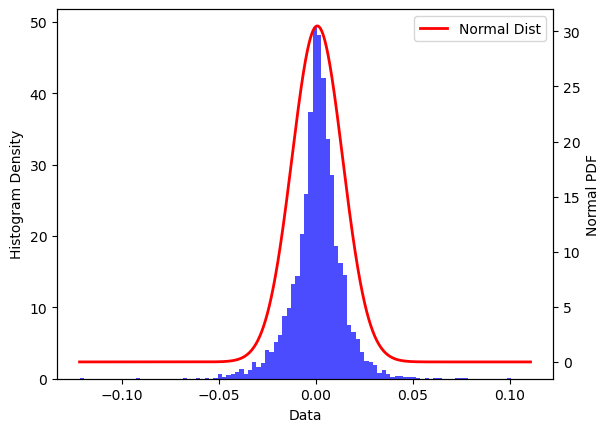

In [41]:
desc = ndx_2010_and_after['return'].describe()
plot_hist_and_overlay_normal(ndx_2010_and_after['return'].to_list(), desc['mean'], desc['std'])

Below we examine plus/minus 3 sigma events counts vs expected

In [47]:
examine_tail_events(ndx_2010_and_after['return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 33.195712905428486
excess right tail events: 17.19571290542849


In [48]:
desc = ndx_2010_and_after['log_return'].describe()
examine_tail_events(ndx_2010_and_after['log_return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 33.1957129054285
excess right tail events: 16.195712905428497


In [49]:
desc = spx_2010_and_after['return'].describe()
examine_tail_events(spx_2010_and_after['return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 28.195712905428497
excess right tail events: 17.195712905428497


In [50]:
desc = spx_2010_and_after['log_return'].describe()
examine_tail_events(spx_2010_and_after['log_return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 31.195712905428497
excess right tail events: 15.195712905428497


Below, we examine plus/minus 4 sigma counts vs expected

In [55]:
desc = ndx_2010_and_after['return'].describe()
examine_tail_events(ndx_2010_and_after['return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 6.887282050315926
excess right tail events: 8.887282050315926


In [54]:
desc = ndx_2010_and_after['log_return'].describe()
examine_tail_events(ndx_2010_and_after['log_return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 8.887282050315926
excess right tail events: 7.887282050315926


In [53]:
desc = spx_2010_and_after['return'].describe()
examine_tail_events(spx_2010_and_after['return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 12.887282050315926
excess right tail events: 11.887282050315926


In [52]:
desc = spx_2010_and_after['log_return'].describe()
examine_tail_events(spx_2010_and_after['log_return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 14.887282050315926
excess right tail events: 11.887282050315926


Below, we examine plus/minus 5 sigma event counts vs expected 

In [57]:
desc = ndx_2010_and_after['return'].describe()
examine_tail_events(ndx_2010_and_after['return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 3.998979807055682
excess right tail events: 4.998979807055682


In [58]:
desc = ndx_2010_and_after['log_return'].describe()
examine_tail_events(ndx_2010_and_after['log_return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 3.998979807055682
excess right tail events: 4.998979807055682


In [59]:
desc = spx_2010_and_after['return'].describe()
examine_tail_events(spx_2010_and_after['return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 5.998979807055682
excess right tail events: 5.998979807055682


In [60]:
desc = spx_2010_and_after['log_return'].describe()
examine_tail_events(spx_2010_and_after['log_return'].to_list(), desc['mean'], desc['std'])

excess left tail events: 5.998979807055682
excess right tail events: 5.998979807055682
